Enrique Tonatiuh Pérez Cortés Barba

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [17]:
import random
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

def movimiento(W0,N): 
    W=[W0]
    X=[1,-1]
    for i in range(N):
        valor=random.choice(X)
        W.append(W[-1]+valor*np.sqrt(.001))
    return W

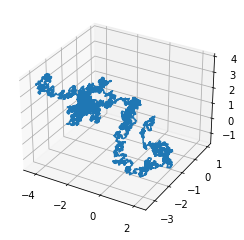

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
x = np.array(movimiento(0,10000))
y = np.array(movimiento(0,10000))
z = np.array(movimiento(0,10000))
plt.plot(x,y,z)

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [39]:
moneda=[1,-1] 
def juego():
    m = random.choice(moneda)
    win = True
    if m != 1:
        win =False
    return win

def opciones_apuesta(C):
    if C[-1] >= 6:
        apuesta = C[-1]/2
    else:
        apuesta = 2
    return apuesta

def Apostador(C0): 
    C = [C0] 
    while C[-1] >= 2 :
        apuesta = opciones_apuesta(C)
        ganaste = juego()
        if ganaste:    
            C.append(C[-1] + apuesta)
        else:
            C.append(C[-1] - apuesta)
    return C

## 1. Grafique la evolución del capital hasta quedar en cero. ## 

En realidad el capital no puede quedar totalmente en cero, ya que la apuesta mínima es 2, si se pierde y se baja a menos de 2 ya no se puede apostar.

[20, 30.0, 45.0, 22.5, 33.75, 16.875, 25.3125, 12.65625, 18.984375, 9.4921875, 4.74609375, 2.74609375, 0.74609375]


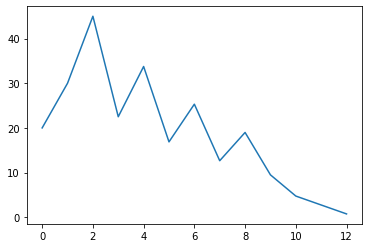

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

apuesta = Apostador(20)

plt.plot(apuesta)
print(apuesta)

## 2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores. ## 

In [70]:
tiros_prom = []
for i in range(10000):
    apuesta = Apostador(20)
    tiros_prom.append(len(apuesta))
print("El número de tiros promedio para perder el capital para poder apostar es: ", np.mean(tiros_prom))
print("Como no hay decimales en los tiros, el resultado sería de aproximadamente", round(np.mean(tiros_prom)), "tiros")

El número de tiros promedio para perder el capital para poder apostar es:  19.7502
Como no hay decimales en los tiros, el resultado sería de aproximadamente 20 tiros


## 3. Muestre un histograma del número de volados. ##

Se ve claramente que la mayoría de los tiros se concentran alrededor del número 20

(array([6.616e+03, 2.165e+03, 7.420e+02, 2.670e+02, 1.050e+02, 5.600e+01,
        2.500e+01, 1.900e+01, 3.000e+00, 2.000e+00]),
 array([  5. ,  20.7,  36.4,  52.1,  67.8,  83.5,  99.2, 114.9, 130.6,
        146.3, 162. ]),
 <BarContainer object of 10 artists>)

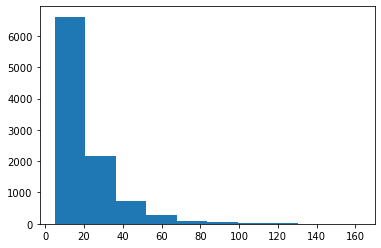

In [71]:
plt.hist(tiros_prom)